In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
import scipy.signal as sig
import os
from IPython.display import Audio

# Part 1: Extraction and visualization of hearbeat signals

In [2]:
files = os.listdir('data')

sample_rates = []
signals = []
signals_normalized = []

for i, file in enumerate(files):
    sample_rate, signal = wavfile.read('data/'+file)
    max_amp = max(signal)
    if max_amp < np.abs(min(signal)):
        max_amp = np.abs(min(signal))
    print(f'{file} > {min(signal)}, {max(signal)}: {max_amp}')
    signals_normalized.append(signal / max_amp)
    sample_rates.append(sample_rate)
    signals.append(signal)

201102081321.wav > -3632, 2902: 3632
201101070953.wav > -2029, 2322: 2322
201102260502.wav > -2690, 3765: 3765
201103291548.wav > -20072, 16958: 20072
201102052338.wav > -17008, 15696: 17008
201101091153.wav > -8498, 8829: 8829
1308162216750.wav > -32768, 32767: 32767
201012172012.wav > -23887, 23072: 23887
201012172010.wav > -1931, 2074: 2074
1308162935880.wav > -32760, 26525: 32760
201105040918.wav > -596, 525: 596
201101051105.wav > -5749, 4002: 5749


In [3]:
sample_rate, signal = wavfile.read('data/201102081321.wav')

print('Sample rate: ', sample_rate)
print('Signal:', signal)
print('Time:', len(signal)/sample_rate)

Sample rate:  44100
Signal: [ 285  270  275 ... 1383 1358 1337]
Time: 7.888571428571429


In [4]:
max_amp = max(signal) if max(signal) > np.abs(min(signal)) else np.abs(min(signal))
signal_normalized = signal / max_amp

print(f'Before normalization: {min(signal)} - {max(signal)}')
print(f'After normalization: {min(signal_normalized)} - {max(signal_normalized)}')
print(signal_normalized)

Before normalization: -3632 - 2902
After normalization: -1.0 - 0.7990088105726872
[0.07846916 0.07433921 0.07571586 ... 0.38078194 0.37389868 0.36811674]


In [5]:
b, a = sig.butter(1, 195, 'low', fs=len(signal))
signal_filtered = sig.filtfilt(b, a, signal)

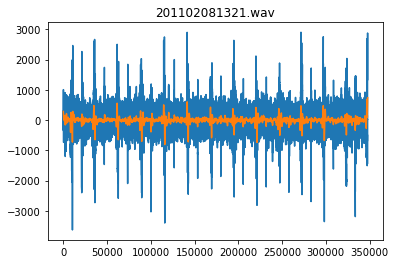

In [6]:
plt.title(files[0])
plt.plot(signal);
plt.plot(signal_filtered);

In [15]:
Audio(signal_filtered, rate=sample_rate)

In [18]:
for f in files:
    print(f)

201102081321.wav
201101070953.wav
201102260502.wav
201103291548.wav
201102052338.wav
201101091153.wav
1308162216750.wav
201012172012.wav
201012172010.wav
1308162935880.wav
201105040918.wav
201101051105.wav


In [8]:
signals_filtered = []
for signal in signals_normalized:
    b, a = sig.butter(1, 195, 'low', fs=len(signal))
    output = sig.filtfilt(b, a, signal)
    signals_filtered.append(output)

In [9]:
 def plot_signals(signals=[], filtered=[], limit=-1):
    fig, axs = plt.subplots(3, 4, figsize=(6*4, 6*3))
    fig.tight_layout()
    for i, signal in enumerate(signals_normalized):
        axs[i//4, i%4].set_title(files[i])
        if len(signals) > i:
            axs[i//4, i%4].plot(range(len(signal[:limit])), signal[:limit]);
        if len(signals_filtered) > i:
            axs[i//4, i%4].plot(range(len(filtered[i][:limit])), filtered[i][:limit]);

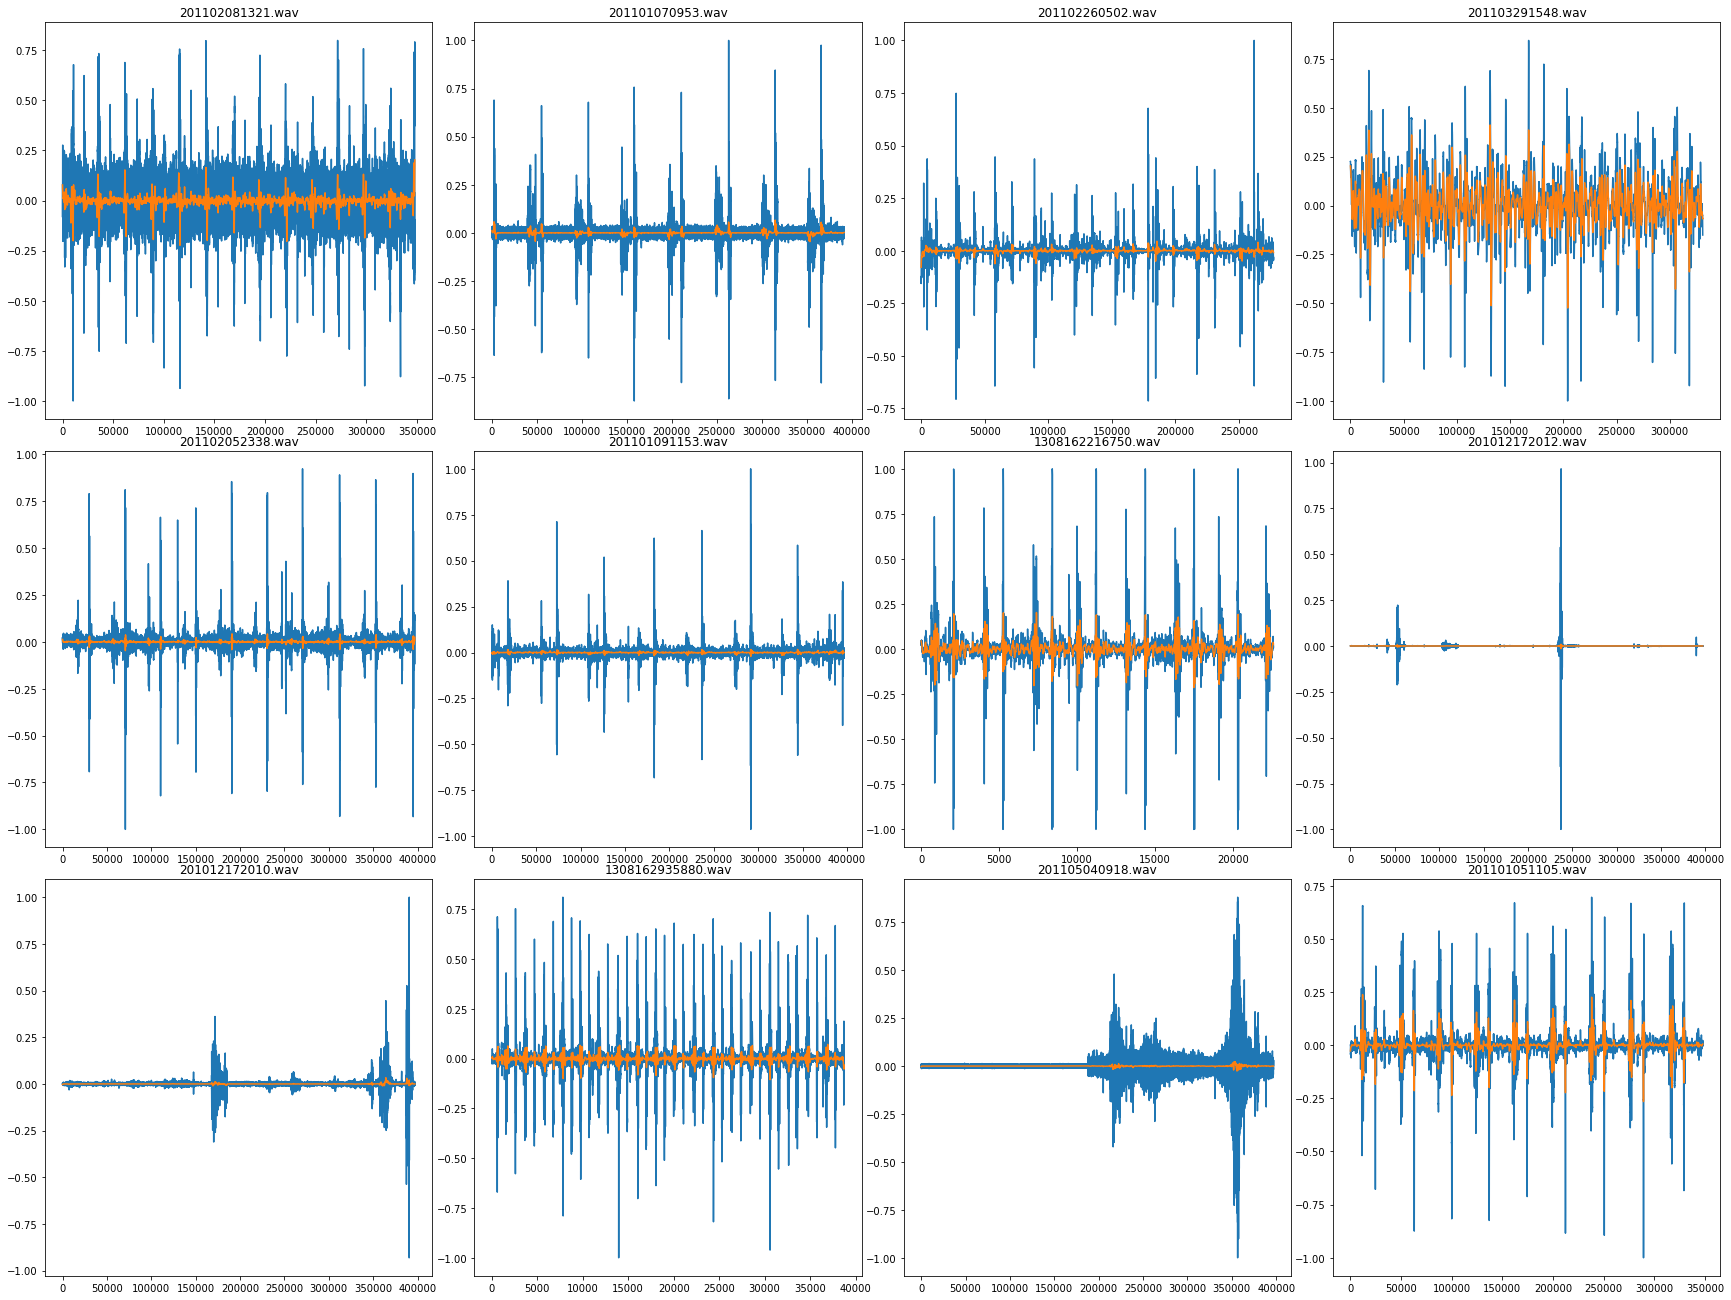

In [10]:
plot_signals(signals, filtered=signals_filtered, limit=-1)

In [11]:
print(sample_rates)

[44100, 44100, 44100, 44100, 44100, 44100, 4000, 44100, 44100, 4000, 44100, 44100]


201102081321.wav


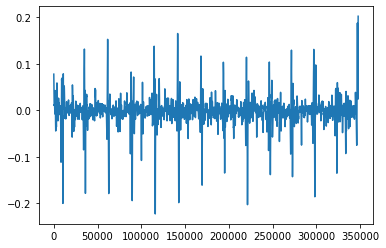

In [12]:
n = 0
plt.plot(signals_filtered[n]);
print(files[n])
Audio(signals_filtered[n], rate=sample_rates[n])
# 0 - normal
# 1 - murmur / extra
# 2 - normal / extra
# 3 - normal / murmur
# 4 - murmur
# 5 - extra
# 6 - extra
# 7 - artifact
# 8 - artifact
# 9 - normal / extra
# 10 - artifact
# 11 - other

---

# Part 2: Classfication of heartbeat signals

In [13]:
categories = ['normal', 'murmur', 'extra', 'artifact', 'extrasystole', 'other']

def classify(sounds):
    pass